# Prediction and Analysis of Coronavirus (COVID19) | Priya Bannur PB 23

### Tasks covered:
1. Imputer class to handle missing values
3. Geocoding geographical data
2. Principal Component Analysis

## Importing essential libraries

In [1]:
# Mathemetical libraries
import math
import random
from datetime import timedelta

# Data storage, manipulation, analysis
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data visualization
import matplotlib.pyplot as plt

# Geographical data
import geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [2]:
# storing covid-19 dataset into dataframe
dataset = pd.read_csv('covid19-dataset.csv', parse_dates=['Date'])

# displaying 5 random data samples
dataset.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
17942,NaN,Haiti,18.9712,-72.2852,2020-03-30,15,0,1
2129,NaN,Cambodia,11.5500,104.9167,2020-01-30,1,0,0
14325,NaN,Pakistan,30.3753,69.3451,2020-03-16,136,0,2
20438,NaN,Algeria,28.0339,1.6596,2020-04-09,1666,235,347
16154,NaN,Niger,17.6078,8.0817,2020-03-23,3,0,0


In [3]:
# checking which column has missing values : Province/State

dataset.isnull().sum()

Province/State    14924
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

## Imputer class to handle missing values

In [4]:
# Handling missing String values using SimpleImputer class
# Province name made same as Country name for null values only

for i in range(len(dataset)):
    imp = SimpleImputer(strategy="constant",fill_value=dataset.iloc[i][1])
    [dataset.iloc[i]]=imp.fit_transform([dataset.iloc[i]])

dataset['Province/State'].isnull().sum()

0

In [5]:
# sorting data as per date

datesorted = dataset.sort_values('Date')
datesorted.head().style.hide_index()

Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
Afghanistan,Afghanistan,33.000000,65.000000,2020-01-22 00:00:00,0,0,0
Aruba,Netherlands,12.518600,-70.035800,2020-01-22 00:00:00,0,0,0
Curacao,Netherlands,12.169600,-68.990000,2020-01-22 00:00:00,0,0,0
Sint Maarten,Netherlands,18.042500,-63.054800,2020-01-22 00:00:00,0,0,0
Netherlands,Netherlands,52.132600,5.291300,2020-01-22 00:00:00,0,0,0


## Geocoding

In [8]:
# Geocoding Geographical data
lat=[]
long=[]
locator = Nominatim(timeout=20)

for i in range(len(datesorted)):
    
    str2=str(datesorted.iloc[i][1])
    coordinates = str2
    results = locator.geocode(coordinates)
    lat.append(results.latitude)
    long.append(results.longitude)
    
#Disclaimer : will throw an error when session times out as connection through API is lost

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


GeocoderTimedOut: Service timed out

In [9]:
#print(lat,long)
len(lat)

170

In [10]:
datesorted.iloc[0:len(lat),0]=lat
datesorted.iloc[0:len(lat),1]=long

In [11]:
datesorted.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,33.768,66.2385,33.0000,65.0000,2020-01-22,0,0,0
166,52.5002,5.74808,12.5186,-70.0358,2020-01-22,0,0,0
167,52.5002,5.74808,12.1696,-68.9900,2020-01-22,0,0,0
168,52.5002,5.74808,18.0425,-63.0548,2020-01-22,0,0,0
169,52.5002,5.74808,52.1326,5.2913,2020-01-22,0,0,0


## Splitting data for training and testing

In [12]:
# Splitting train-test data (70-30 %)

X=datesorted.iloc[0:170,0:4].values    # Province, Country, Lat, Long
Y=datesorted.iloc[0:170,4:].values     # confirmed, recovered and death cases

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,shuffle=False,random_state=1)

## Principal Component Analaysis

In [13]:
pca=PCA(.95) 

In [14]:
pcs=pca.fit(xtrain)

In [15]:
X_train = pca.transform(xtrain)
X_test = pca.transform(xtest)

In [16]:
print(X_train.shape)                                                  #size after PCA
print(X_test.shape)

(119, 2)
(51, 2)


In [17]:
pca.n_components_                                                     #2 columns pruned

2

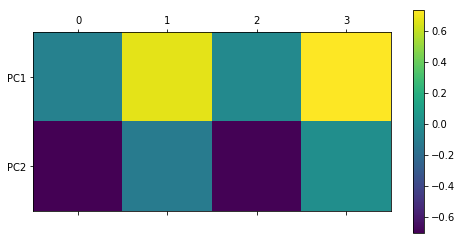

In [25]:
# Visualizing contribution of various attributes in principal components 
n_components=np.where(np.cumsum(pca.explained_variance_ratio_)>0.95)[0][0]+1

components_range = np.arange(1, n_components+1, 1)

components_names = list(map(lambda x: 'PC' + str(x), components_range))

plt.matshow(pcs.components_,cmap='viridis')
plt.yticks(range(0,n_components), components_names,fontsize=10)

plt.colorbar()
plt.show()

0=Province, 1=Country, 2=Lat, 3=Long